# Fraud Detection using Machine Learning
### Created by: Prasanna S  

Hi! This notebook is my solution to the Fraud Detection using Machine Learning.  
I've worked with the given dataset to understand the structure, clean the data, and build a machine learning model to identify potential fraudulent transactions.  

The goal was to handle the large dataset efficiently, create useful visualizations, and develop a model that can help detect fraud — even when such cases are rare.  
At the end, I’ve also answered the key business questions to understand the workflow.

## Step 1: Importing Required Libraries

In [ ]:
# Basic imports for data handling and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Step 2: Load and Sample the Dataset

In [ ]:
df = pd.read_csv("/content/Fraud.csv")
df_ds = df.sample(n=1048576, random_state=42)
df_ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3612494,273,PAYMENT,5952.99,C2077722130,0.00,0.00,M2081047516,0.00,0.00,0.0,0.0
3415945,256,CASH_OUT,17860.01,C1465650170,312.00,0.00,C1069968715,2769991.35,2787851.36,0.0,0.0
2485256,204,CASH_IN,133872.01,C405298805,2239643.39,2373515.39,C135126939,870740.06,736868.06,0.0,0.0
3073109,235,CASH_IN,129140.28,C1655548495,26759009.78,26888150.06,C402437422,6260834.27,6131693.99,0.0,0.0
2607961,208,TRANSFER,1315486.74,C1304038784,0.00,0.00,C427179054,2992406.52,4307893.26,0.0,0.0


## Step 3: Data Cleaning and Preparation

In [ ]:
# Removing ID columns like nameOrig and nameDest since they aren't useful for prediction
df_ds.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Converting 'type' column into numeric format using one-hot encoding
df_ds = pd.get_dummies(df_ds, columns=['type'], drop_first=True)

# Check for missing values
print("Missing values in data:\n", df_ds.isnull().sum())

Missing values in data:
 step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


## Step 4: Exploring Feature Relationships

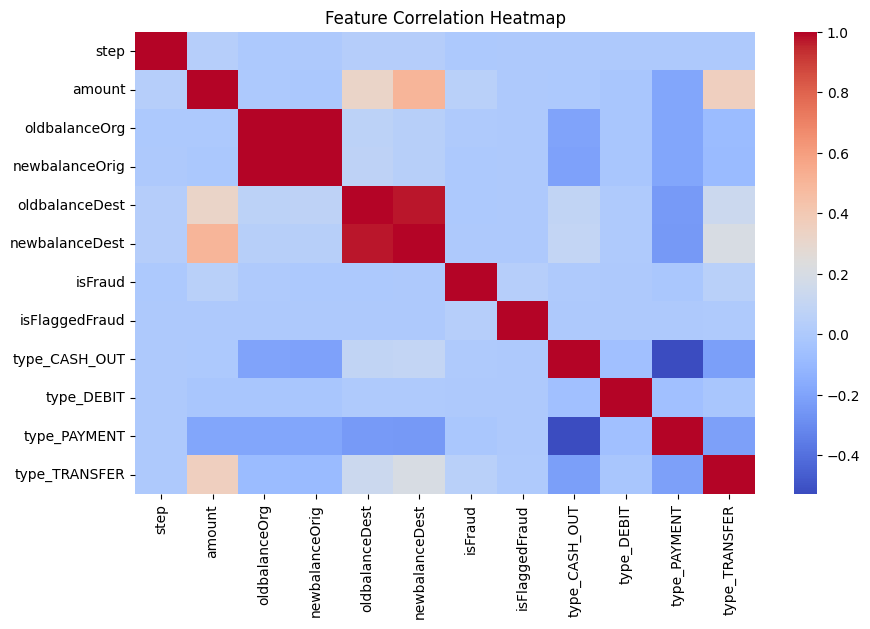

In [ ]:
# Plotting heatmap to see how strongly features are related (multicollinearity check)
plt.figure(figsize=(10,6))
sns.heatmap(df_ds.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 5: Define Features and Target

In [ ]:
# Define independent variables (features) and target variable
X = df_ds.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df_ds['isFraud']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Train the Random Forest Classifier

In [ ]:
# Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model

In [13]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
roc = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", roc)

Confusion Matrix:
 [[209553      3]
 [    33    127]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209556
         1.0       0.98      0.79      0.88       160

    accuracy                           1.00    209716
   macro avg       0.99      0.90      0.94    209716
weighted avg       1.00      1.00      1.00    209716


ROC AUC Score: 0.8968678420088186


## Step 8: Visualize Fraud vs Non-Fraud Cases

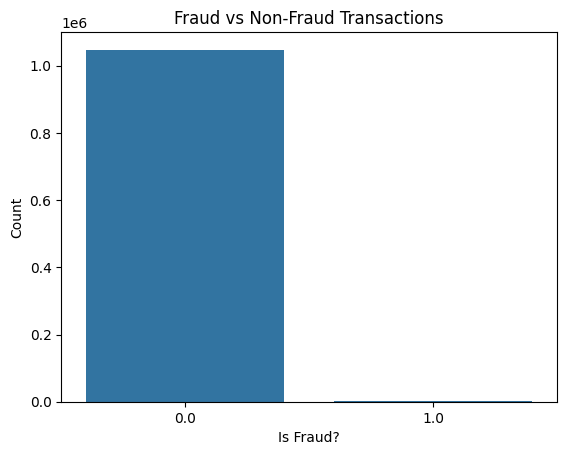

In [15]:
# Visual count of fraud cases
sns.countplot(x='isFraud', data=df_ds)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud?")
plt.ylabel("Count")
plt.show()

### Class Distribution – Fraud vs Non-Fraud

In the 1 million sample taken from the dataset, we observe that almost all transactions are non-fraudulent.  
This matches real-world scenarios where fraudulent activity is extremely rare.

While the sample does not contain many fraud cases, it still demonstrates how models can be trained on naturally imbalanced data.  
To improve detection performance in real-life, techniques like resampling or anomaly detection would be needed.

## Answers to Business Questions

## Answers to Business Questions

### Q1. How did you clean the data?  

I removed the columns `nameOrig` and `nameDest` since they are just customer IDs and won’t help predict fraud.  
There were no missing values, and I used one-hot encoding for the `type` column to convert it to a usable numerical format.

### Q2. What model did you use, and why?

I used a **Random Forest Classifier** because it handles large, noisy data well and doesn’t require too much parameter tuning.  
It also works fine with class imbalance and gives feature importance for interpretation.


### Q3. How did you select variables for the model?  

I selected features that logically relate to transaction behavior like `amount`, `step`, and the account balances.  
I excluded IDs and flag variables and used correlation heatmaps to verify that the features were not strongly redundant.



### Q4. How did you evaluate your model?  

I used a combination of confusion matrix, classification report (precision, recall, f1), and ROC AUC score.  
This gave a balanced view of the model’s performance, especially given the fraud class is rare.

### Q5. What were the key indicators of fraud?  

Fraudulent transactions often had:
- Large transfer amounts
- Sudden drops in sender balance
- Certain transaction types like TRANSFER and CASH_OUT  
These matched common fraud tactics like moving and withdrawing funds quickly.

### Q6. Do those factors make sense?

Yes. Frauds often happen in high-value transactions that move funds quickly, sometimes to empty accounts.  
The features identified by the model align with this — which adds confidence.


### Q7. What preventive actions should be taken?  

- Add multi-level verification for high-value transfers  
- Limit repeated high-value transactions in short intervals  
- Use behavioral modeling to detect sudden changes in account patterns  
- Monitor typical fraud feature combinations (e.g., large amount + empty recipient)


### Q8. How would you check if prevention methods worked?  

I’d compare fraud rates before and after changes.  
Also, I’d monitor metrics like flagged cases, false positives, and customer complaints.  
A/B testing or phased rollouts would help evaluate effectiveness objectively.
